In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My\ Drive/dataset/bird song data set

/content/drive/My Drive/dataset/bird song data set


In [6]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
from scipy.stats import f
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("bird train.csv", header=None)

In [ ]:
df.tail()

In [8]:
def T2Test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape

    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    
    #calculate covariance
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    
    #print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

***********************************************************************************

**TSNE DIMENSIONALITY REDUCTION**

In [6]:
import pandas as pd


In [7]:
df = pd.read_csv("bird train.csv", header=None)

In [ ]:
df.shape

(16626, 170)

In [ ]:
target_variable = df[0]
features_variable= df.drop(0,axis=1)

In [ ]:
features_variable.shape

(16626, 169)

In [ ]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(features_variable)

In [ ]:
#standarized_data[0]

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
tsne_data2 = model.fit_transform(standarized_data)

In [ ]:
print(standarized_data.shape)
print(tsne_data2.shape)

(16626, 169)
(16626, 2)


In [ ]:
mean_vector_pop = np.mean(tsne_data2)
mean_vector_pop

***********************************************************************************************

** TSNE for a particular sample set**

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
n = 100
size = 500
q = []
sample_list = []
p_values100 = []
arr_sampleList = []
Features_variable = []
Target_variable = []
DR_data = []
tsne_data = []
arr_tsne_data = []
SampleVectorMean = []

for i in range(n):
    p = T2Test(df, df.sample(size))[1]
    p_values100.append(p)
    q = df.sample(size)
    #sample_list.append(q)
    arr_sampleList = np.array(q)
    Features_variable = arr_sampleList[:, 1:]
    Target_variable = arr_sampleList[:,0]
    standarized_data = StandardScaler().fit_transform(Features_variable)
    tsne_data = model.fit_transform(standarized_data)
    arr_tsne_data = np.array(tsne_data)
    DR_mean = np.mean(arr_tsne_data)
    SampleVectorMean.append(DR_mean)

print (SampleVectorMean)
print (p_values100)

[-0.8981266, -0.36837575, -0.34161237, 0.574195, -2.2811465, -0.7456345, -0.11563243, -0.8739149, 0.26114056, 1.2479709, -0.31393415, 0.05054186, -0.31374305, 0.81169266, 0.42881566, 0.18391244, 1.4952353, 0.20232402, -0.41768262, 0.79975486, 0.013548096, -0.31392485, -0.1369147, -0.3652973, 1.8496108, 0.7126414, 0.32899505, 0.38578528, -0.2700159, -0.5838151, 0.51858425, 0.43095377, -0.46600205, -1.1233873, 1.19155, 1.2476397, -0.9123953, -0.08048586, -0.6100168, -0.21214642, 0.39752033, 0.036724433, -1.733702, 1.510701, 0.41355965, -0.2507873, 0.08365082, -0.17640668, 0.76503336, -1.3309641, -1.2103828, -1.4896408, -0.41810206, 0.06782257, 0.20358853, -2.8334901, -0.37293258, 0.13571423, -0.711492, 0.13904877, -0.5891941, -0.15809758, 1.9820669, -0.3620153, -0.3155253, 2.0173428, 1.2168193, -0.58189285, 0.79020375, 0.50034124, -0.5755368, -0.37590426, -3.170441, 0.14648232, -1.0503654, 1.8858243, 1.9315314, -0.2318553, -0.36778522, 1.5197722, -1.0917393, -0.43708807, -0.03851616, -0.

In [10]:
y = pd.DataFrame(SampleVectorMean)

In [75]:
#y

In [11]:
x = pd.DataFrame(p_values100)
#x

In [12]:
sample_tsnedata = pd.concat([y, x], axis=1, join='inner')
#sample_tsnedata


In [13]:
sample_tsnedata.to_csv('data_for_plotting.csv')

In [14]:
data_to_plot = pd.read_csv('data_for_plotting.csv')
#data_to_plot.head()

In [15]:
c = data_to_plot.rename(columns= {'Unnamed: 0': 'sample_index', '0':'sample_mean_vector', '0.1':'pvalues'}, inplace=False)

In [96]:
#c.head(50)

In [16]:
df_final = pd.DataFrame(data_to_plot)

In [17]:
# Generate results as pass or fail
results = []

for value in c["pvalues"]:
    if value >= 0.05:
        results.append('pass')
    else:
        results.append('fail')
       
c["Result"] = results   
print(c)

    sample_index  sample_mean_vector   pvalues Result
0              0           -0.898127  0.644397   pass
1              1           -0.368376  0.811753   pass
2              2           -0.341612  0.456193   pass
3              3            0.574195  0.997079   pass
4              4           -2.281147  0.971990   pass
..           ...                 ...       ...    ...
95            95           -1.493952  0.435539   pass
96            96           -1.216912  0.926181   pass
97            97           -0.621683  0.995010   pass
98            98           -1.096498  0.533328   pass
99            99           -0.598161  0.727698   pass

[100 rows x 4 columns]


In [18]:
data_for_scatterplot = pd.DataFrame(c)

In [19]:
g=data_for_scatterplot.sort_values(by= 'Result')

In [24]:
g.head(10)

,sample_index,sample_mean_vector,pvalues,Result
57,57,0.135714,0.025759,fail
15,15,0.183912,0.004908,fail
0,0,-0.898127,0.644397,pass
72,72,-3.170441,0.324251,pass
71,71,-0.375904,0.418319,pass
70,70,-0.575537,0.505875,pass
69,69,0.500341,0.943918,pass
68,68,0.790204,0.849998,pass
67,67,-0.581893,0.982990,pass
66,66,1.216819,0.733180,pass


In [21]:
mean_vector_pop = -1.09

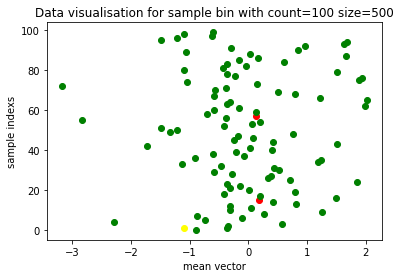

In [23]:
import matplotlib.pyplot as plt


x = data_for_scatterplot['sample_mean_vector']
y = data_for_scatterplot['sample_index']

for SMV in data_for_scatterplot['sample_mean_vector']:
  for n, row in data_for_scatterplot.loc[data_for_scatterplot.sample_mean_vector == SMV].iterrows():
      if row['Result'] == "fail":
          plt.scatter(SMV,n,color = 'red')
          #plt.pause(0.5)
      if row['Result'] == "pass":
          plt.scatter(SMV,n,color = 'green')
          #plt.pause(0.5)
plt.scatter(mean_vector_pop,1,color = "yellow")
plt.xlabel('mean vector')
plt.ylabel('sample indexs')
plt.title('Data visualisation for sample bin with count=100 size=500')
plt.show()